In [51]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Make some data up

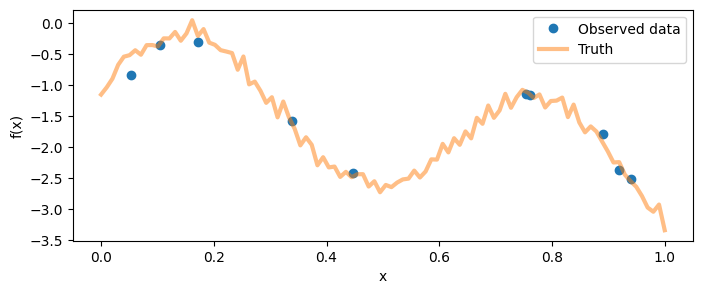

In [52]:
x = np.random.rand(10, 1)
xt = np.linspace(0, 1, 100).reshape(100,1)
f = lambda u: np.sin(u*10) - np.exp(u) + \
            np.random.randn(u.shape[0],1)*0.1
y = f(x)

fig = plt.figure(figsize=(8,3))
plt.plot(x, y, 'o', label='Observed data')
plt.plot(xt, f(xt), lw=3, label='Truth', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Step 2. Build model

In [53]:
# x - x' (10 x 10)
x_tile = np.tile(x, [1, 10]) - np.tile(x.T, [10, 1])
x_dist = x_tile**2

# xt - x' (100 x 10)
x_tile_2 = np.tile(xt, [1, 10]) - np.tile(x.T, [100,1])
x_dist_2 = x_tile_2**2

# xt - xt' (100 x 100)
x_tile_3 = np.tile(xt, [1, 100]) - np.tile(xt.T, [100,1])
x_dist_3 = x_tile_3**2

l = 200
Kxx = np.exp(-l * x_dist)
Kxtx = np.exp(-l * x_dist_2)
Kxtxt = np.exp(-l * x_dist_3)

S = 0.01 * np.eye(10)

mu = Kxtx @ np.linalg.inv(Kxx + S) @ y
cov = Kxtxt - Kxtx @ np.linalg.inv(Kxx + S) @ Kxtx.T

In [54]:
std = np.sqrt(np.diag(cov))

mu = mu.flatten()
std = std.flatten()
xt = xt.flatten()

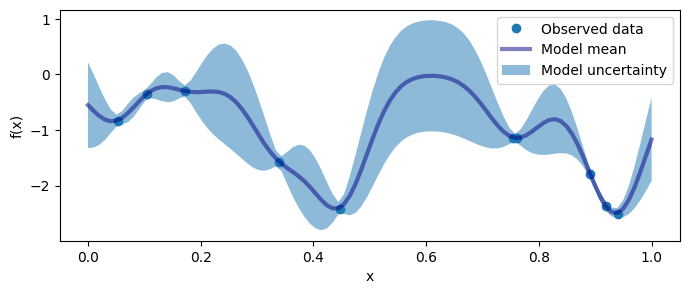

In [55]:
fig = plt.figure(figsize=(8,3))
plt.plot(x, y, 'o', label='Observed data')
plt.plot(xt, mu, lw=3, color='navy', label='Model mean', alpha=0.5)
plt.fill_between(xt, mu - std, mu + std, alpha=0.5, \
         label='Model uncertainty')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()